## Polynomial Regression

Polynomial Regression is used when the data is not actually linear (i.e.) it looks curvy. In fact, many different regressions exist such as quadratic, cubic etc. are available and can be used to fit in the dataset. <br>

In my case, I am using the the two degree polynomial

There is only one x value namely Engine Size but to fit the equation of polynomial regression can be done by creating  few additional features as 1, $x$, and $x^2$. <br>
    
**PolynomialFeatures()** function can be used to create a new feature sets from the original feature set. <br>
Here,3 features are created from our dataset as degree=0, degree=1 and degree=2 <br>
The polynomial regression is considered as a special case of traditional multiple linear regression. <br>

Dataset is split manually and also by using train_test_split() where their both accuracies are compared finally.

In [1]:
# Load all necessary header files or libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sea
%matplotlib inline

In [3]:
#Loading the dataset called FuelConsumption.csv
dataset=pd.read_csv('/......//FuelConsumption.csv')

#Visualizing the first 10 rows of the dataset
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
dataset.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


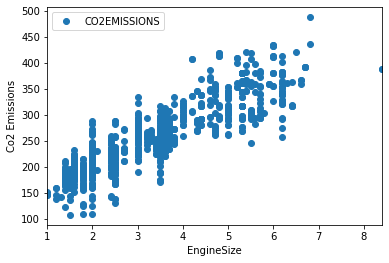

In [12]:
#Plotting
dataset.plot(x='ENGINESIZE',y='CO2EMISSIONS',style='o')
plt.xlabel("EngineSize")
plt.ylabel("Co2 Emissions")
plt.show()

In [16]:
#Manual Splitting of dataset into 80% training set and 20% testing set 
randd=np.random.rand(len(dataset))<0.8
train=dataset[randd]
test=dataset[~randd]

train_x1=np.asanyarray(train[['ENGINESIZE']])
train_y1=np.asanyarray(train[['CO2EMISSIONS']])
test_x1=np.asanyarray(test[['ENGINESIZE']])
test_y1=np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)

#fit_transform() takes the x values and returns a matrix of data raised from power of 0 to power of 2 as the degree is 2.
train_x1_poly=poly.fit_transform(train_x1)
train_x1_poly



array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [17]:
#Splitting of dataset using train_test_split()
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(dataset['ENGINESIZE'].values.reshape(-1,1),dataset['CO2EMISSIONS'].values.reshape(-1,1),test_size=0.2,random_state=0)

train_x_poly=poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  3.6 , 12.96],
       [ 1.  ,  4.6 , 21.16],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.7 , 13.69]])

In [22]:
regression1=linear_model.LinearRegression()
regression2=linear_model.LinearRegression()
#Training both the training sets
regression1.fit(train_x1_poly,train_y1)
regression2.fit(train_x_poly,train_y)

#Without using train_test_split()
print("Coefficient:",regression1.coef_)
print("Intercept: ",regression1.intercept_)

#With using train_test_split()
print("\nCoefficient:",regression2.coef_)
print("Intercept: ",regression2.intercept_)

Coefficient: [[ 0.         51.94552284 -1.74408476]]
Intercept:  [105.81392628]

Coefficient: [[ 0.         49.44724505 -1.34988027]]
Intercept:  [109.857053]


Text(0, 0.5, 'Co2 Emission')

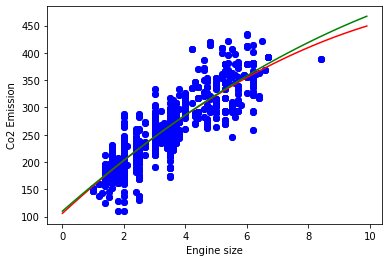

In [27]:
#Plotting best fit line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regression1.intercept_[0]+ regression1.coef_[0][1]*XX+ regression1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Co2 Emission")

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regression2.intercept_[0]+ regression2.coef_[0][1]*XX+ regression2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-g' )
plt.xlabel("Engine size")
plt.ylabel("Co2 Emission")


In [30]:
test_x_poly = poly.fit_transform(test_x)
#Predicting values using test data x
test_y_predict=regression.predict(test_x_poly)

dataframe=pd.DataFrame({'Actual Value': test_y.flatten(), 'Predicted Value': test_y_predict.flatten()})
dataframe.head(25)


,Actual Value,Predicted Value
0,356,340.983023
1,209,220.755131
2,230,220.755131
3,212,233.523987
4,168,225.038414
5,292,301.291249
6,212,220.755131
7,276,270.372687
8,202,220.755131
9,334,323.346271


#### Model Evaluation

In [31]:
print("Mean Absolute Error:",metrics.mean_absolute_error(test_y,test_y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(test_y,test_y_predict))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y,test_y_predict)))
print('R2 Score:',metrics.r2_score(test_y,test_y_predict))

Mean Absolute Error: 25.5139940890629
Mean Squared Error: 1166.336791924399
Root Mean Squared Error: 34.151673340034144
R2 Score: 0.7237141291367734


Reference: <br> 
https://www.coursera.org/